# Mengimpor Library


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from IPython.display import Image

%matplotlib inline

# Mendeklarasikan Gambar


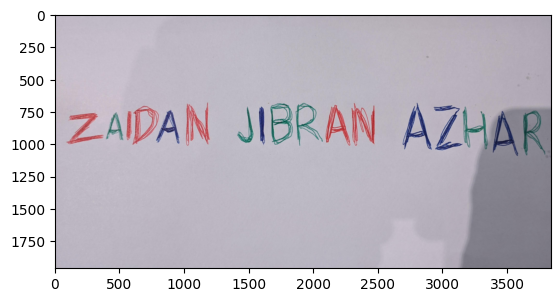

In [30]:
color_image = img.imread('nama.jpg')
plt.imshow(color_image)

# Mendeklarasikan dan membagi citra warna

(-0.5, 3839.5, 1960.5, -0.5)

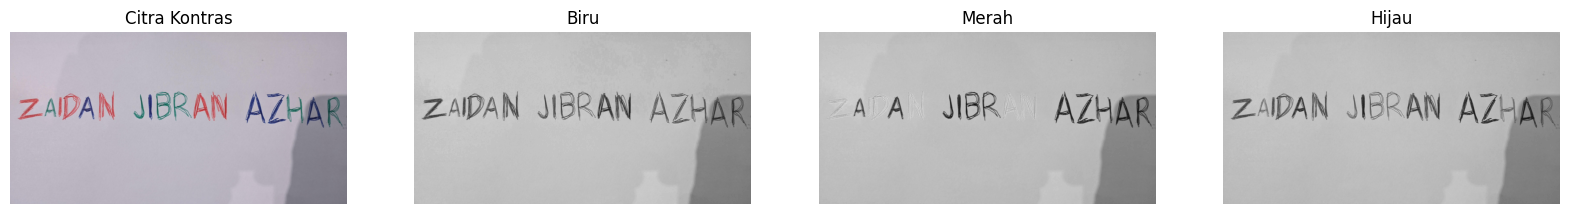

In [31]:
r = color_image[:, :, 0]
g = color_image[:, :, 1]
b = color_image[:, :, 2]

f, (x1, x2, x3, x4) = plt.subplots(1, 4, figsize = (20,10))

x1.set_title('Citra Kontras')
x1.imshow(color_image)
x1.axis('off')

x2.set_title('Biru')
x2.imshow(b, cmap='gray')
x2.axis('off')

x3.set_title('Merah')
x3.imshow(r, cmap='gray')
x3.axis('off')

x4.set_title('Hijau')
x4.imshow(g, cmap='gray')
x4.axis('off')

# Mendeklarasikan Kembali File

In [32]:
color_image = cv2.imread('nama.jpg')

# Menghitung dan Mendeklarasikan Setiap Warna

In [33]:
histogram_biru = cv2.calcHist([b], [0], None, [256], [0, 256])
histogram_hijau = cv2.calcHist([g], [0], None, [256], [0, 256])
histogram_merah = cv2.calcHist([r], [0], None, [256], [0, 256])
histogram_warna = cv2.calcHist([color_image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

# Menampilkan histogram dari masing-masing warna


(0.0, 256.0)

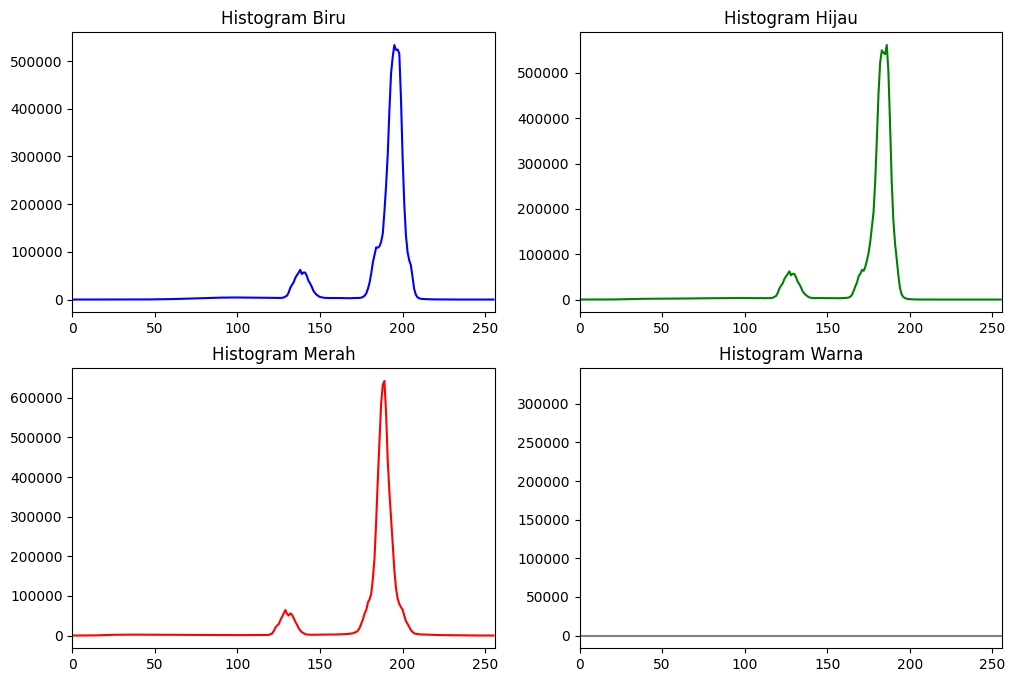

In [34]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)  # Subplot 1 (atas kiri)
plt.plot(histogram_biru, color='b')
plt.title('Histogram Biru')
plt.xlim([0, 256])

plt.subplot(2, 2, 2)  # Subplot 2 (atas kanan)
plt.plot(histogram_hijau, color='g')
plt.title('Histogram Hijau')
plt.xlim([0, 256])

plt.subplot(2, 2, 3)  # Subplot 3 (bawah kiri)
plt.plot(histogram_merah, color='r')
plt.title('Histogram Merah')
plt.xlim([0, 256])


plt.subplot(2, 2, 4)  # Subplot 4 (bawah kanan)
plt.plot(histogram_warna.flatten(), color='gray')  # Flatten histogram multi-dimensi
plt.title('Histogram Warna')
plt.xlim([0, 256])

# Mendeklarasikan kembali file dan mengKonversi citra ke dalam ruang warna HSV

In [35]:
color_image = cv2.imread('nama.jpg')
hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

# Definisikan rentang warna untuk setiap warna

In [36]:
lower_blue = np.array([90, 100, 100])
upper_blue = np.array([130, 255, 255])

lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Mendeteksi Warna biru hijau dan merah

In [37]:
# Deteksi warna biru
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)
# Deteksi warna hijau
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
# Deteksi warna merah
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Gabungkan masker untuk warna merah dan biru
mask_red_blue = cv2.bitwise_or(mask_red, mask_blue)
# Gabungkan masker untuk warna merah dan biru
mask_red_blue_green = cv2.bitwise_or(cv2.bitwise_or(mask_red, mask_blue), mask_green)


# Menampilkan Hasil

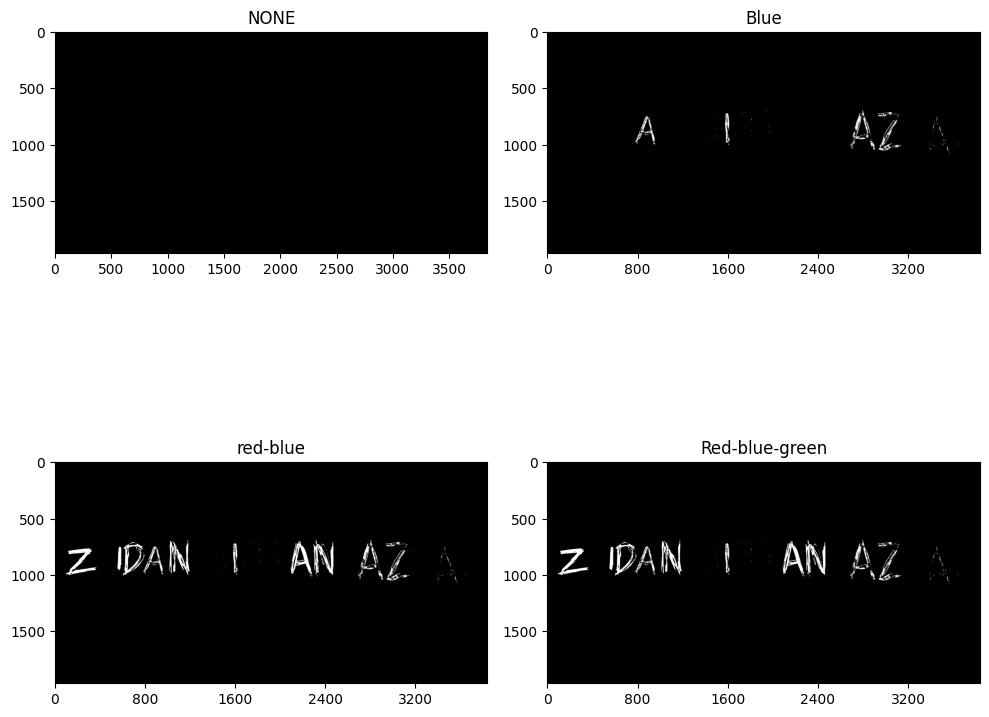

In [38]:
#gambar 1
gray = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 0, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

#gambar 2
plt.subplot(2, 2, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title('Blue')
plt.xticks(np.arange(0, mask_blue.shape[1]+1, 800))
plt.yticks(np.arange(0, mask_blue.shape[0]+1, 500))
plt.axis('on')

#gambar 3
plt.subplot(2, 2, 3)
plt.imshow(np.maximum(mask_red, mask_blue), cmap='gray')
plt.title('red-blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

#gambar 4
plt.subplot(2, 2, 4)
plt.imshow(mask_red_blue_green, cmap='gray')
plt.title('Red-blue-green')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

#menampilkan output
plt.tight_layout()
plt.show()